In [1]:
import pickle

In [42]:
selection_modes = ["ruleta", "top"]
join_modes = ["cross", "none", "cross-old"]
num_total_agents = [20,50,100, 200,500,5000]
results = {}

In [43]:
for agents in num_total_agents:
    with open(f'results/results_{agents}.pickle', 'rb') as handle:
        b = pickle.load(handle)
    results[agents] = b

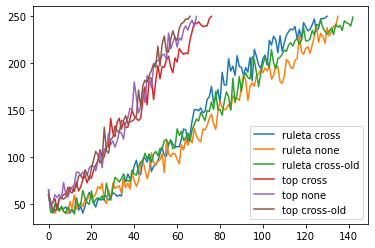

In [44]:
import pandas as pd
import seaborn as sns

for select_mode in selection_modes:
    for join_mode in join_modes:
        data = results[5000][(select_mode,join_mode)]
        sns.lineplot(list(range(len(data))),data,label=select_mode + " " + join_mode)

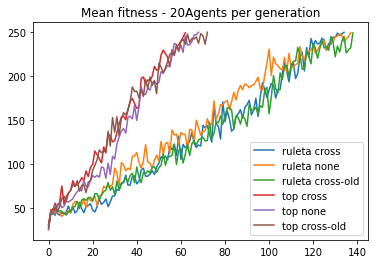

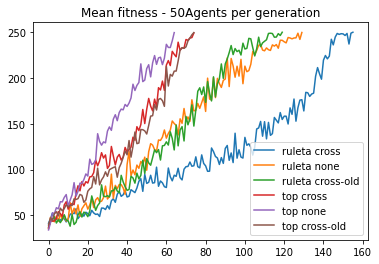

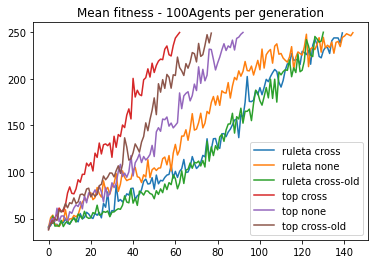

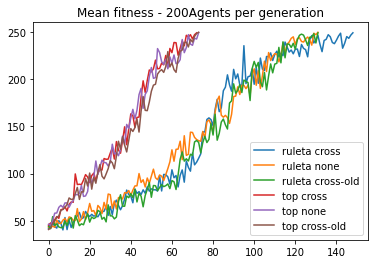

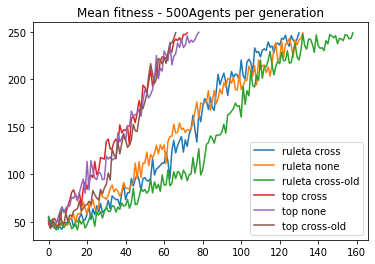

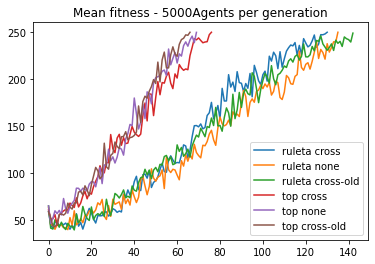

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
for agents in num_total_agents:
    for select_mode in selection_modes:
        for join_mode in join_modes:
            data = results[agents][(select_mode,join_mode)]
            sns.lineplot(list(range(len(data))),data,label=select_mode + " " + join_mode).set_title(f"Mean fitness - {agents}Agents per generation")
    plt.show()

In [50]:
len_results = {}
for agents in num_total_agents:
    len_results[agents] = {}
    for select_mode in selection_modes:
        for join_mode in join_modes:
            len_results[agents][(select_mode,join_mode)] = len(results[agents][(select_mode,join_mode)])
            

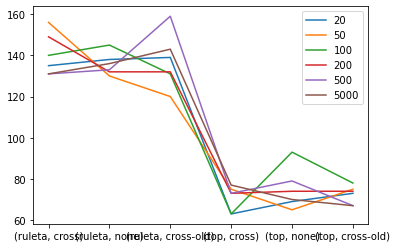

In [55]:
pd.DataFrame.from_dict(len_results).plot()